In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, SGDRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

* genre: Type of song
* artist_name: Artist name 
* track_name: The name of the song
* track_id: The Spotify ID for the track.
* popularity: Popularity percentage of the song
* acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* danceability: Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* duration_ms: The duration of the track in milliseconds.
* energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
* instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal.” The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
* liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
* mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* time_signature: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".
* valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [2]:
df = pd.read_csv('C:/Users/mikha/ML_Projects/Data/SpotifyFeatures.csv')
df.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
df.shape

(232725, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

Check for Null.

In [5]:
df.isnull().any()

genre               False
artist_name         False
track_name          False
track_id            False
popularity          False
acousticness        False
danceability        False
duration_ms         False
energy              False
instrumentalness    False
key                 False
liveness            False
loudness            False
mode                False
speechiness         False
tempo               False
time_signature      False
valence             False
dtype: bool

**Check for dublicates**


In [6]:
unique_songs = df.track_id.unique().shape[0]
print("Number of unique songs", unique_songs)

Number of unique songs 176774


In [7]:
print("Number of duplicates: ", (df.shape[0]- unique_songs))

Number of duplicates:  55951


In [8]:
df_un = df.copy()  # create data for unique values

Check the features types

**There are a lot of duplicates, because the song can relate to several genres. We need to deal with it.**

In [9]:
print(df_un.genre.unique())
len(df_un.genre.unique())

['Movie' 'R&B' 'A Capella' 'Alternative' 'Country' 'Dance' 'Electronic'
 'Anime' 'Folk' 'Blues' 'Opera' 'Hip-Hop' "Children's Music"
 'Children’s Music' 'Rap' 'Indie' 'Classical' 'Pop' 'Reggae' 'Reggaeton'
 'Jazz' 'Rock' 'Ska' 'Comedy' 'Soul' 'Soundtrack' 'World']


27

We have dublicated genre Children's Music.

In [10]:
df_un.loc[df_un['genre'] == "Children's Music", 'genre'] = 'Children’s Music'
df_un.genre.unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       'Children’s Music', 'Rap', 'Indie', 'Classical', 'Pop', 'Reggae',
       'Reggaeton', 'Jazz', 'Rock', 'Ska', 'Comedy', 'Soul', 'Soundtrack',
       'World'], dtype=object)

Firstly, let's look at genre and popularity dependence in order to decide if we should to encode genres or just drop all duplicates.

<AxesSubplot:xlabel='genre', ylabel='popularity'>

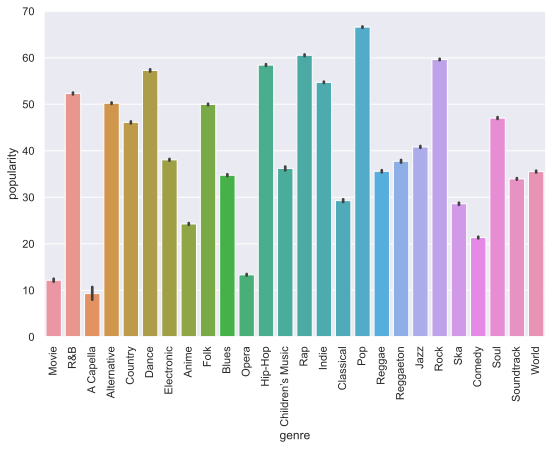

In [11]:
f, ax = plt.subplots(figsize=(9, 6))
plt.xticks(rotation=90)
sns.barplot(x="genre", y="popularity", data=df_un, ax=ax)

There is a great correlation between genres and popularity so we need to encode. I will implement One-Hot encoding.

In [12]:
genres = df_un.genre.unique()
for gen in genres:
    df_un[gen] = False

for genre in genres:
    df_un.loc[df_un.genre.isin([genre]), genre] = True
df_un.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,...,Pop,Reggae,Reggaeton,Jazz,Rock,Ska,Comedy,Soul,Soundtrack,World
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,...,False,False,False,False,False,False,False,False,False,False
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,...,False,False,False,False,False,False,False,False,False,False
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,...,False,False,False,False,False,False,False,False,False,False
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,...,False,False,False,False,False,False,False,False,False,False
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,...,False,False,False,False,False,False,False,False,False,False


In [13]:
print("All data size", df_un.shape[0])
print("Number of duplicates: ",  (df_un.duplicated("track_id", keep=False)).sum())

All data size 232725
Number of duplicates:  91075


In [14]:
df_un = df_un.drop_duplicates("track_id")

In [15]:
print("Number of duplicates: ",  (df_un.duplicated("track_id", keep=False)).sum())

Number of duplicates:  0


Since we encode genres, we can drop genre column.

In [16]:
df_un = df_un.drop(columns = ['genre'],axis = 1)
df_un.head(1)

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,...,Pop,Reggae,Reggaeton,Jazz,Rock,Ska,Comedy,Soul,Soundtrack,World
0,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.91,0.0,C#,...,False,False,False,False,False,False,False,False,False,False


Now we check the correlation between numeric features. Drop the genres, because we already saw the chart.


<AxesSubplot:>

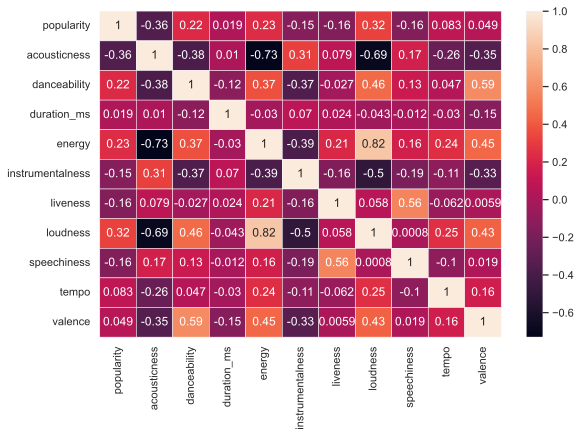

In [17]:
f, ax = plt.subplots(figsize=(9, 6))
corr_matrix = df_un.select_dtypes(exclude='bool').corr()
sns.heatmap(corr_matrix, annot=True, linewidths=.5, ax=ax)

I plot the dependency of the most important variables and popularity.

The acousticness has negative result on popularity

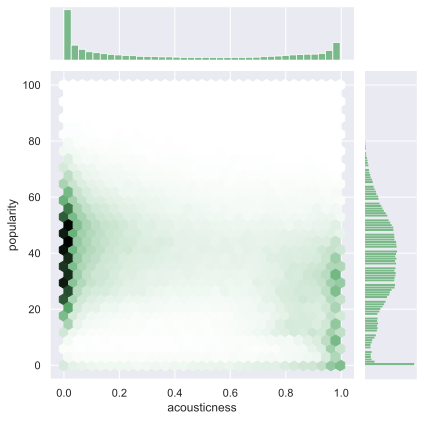

In [18]:
features_1 = ["acousticness", "popularity"]
sns.jointplot(data=df_un, x="acousticness", y="popularity", kind="hex", gridsize=30, color='g')

I rounded some features to have better illustration.

The best danceability is about 0.8

<AxesSubplot:xlabel='danceability', ylabel='popularity'>

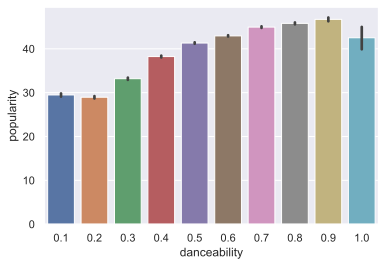

In [19]:
df_2 = np.round(df[['danceability', 'popularity']], 1)
sns.barplot(x="danceability", y="popularity", data=df_2)

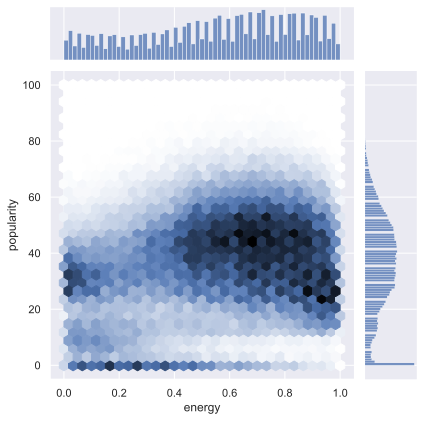

In [20]:
df_2 = np.round(df_un[['energy', 'popularity']], 2)
sns.jointplot(data=df_2, x="energy", y="popularity", kind="hex", gridsize=30)

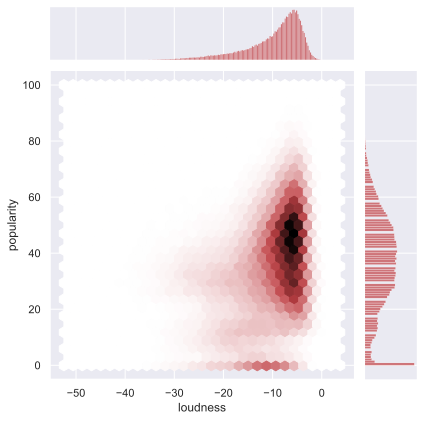

In [21]:
df_2 = np.round(df_un[['loudness', 'popularity']], 2)
sns.jointplot(data=df_2, x="loudness", y="popularity", kind="hex", gridsize=30, color='r')

Also, we need to check some non numeric features. Firstly, I will check the influence on popularity and decide to encode or drop this variable.

In [22]:
df.key.nunique()

12

As we can see, the key does not contribute much.

<AxesSubplot:xlabel='key', ylabel='popularity'>

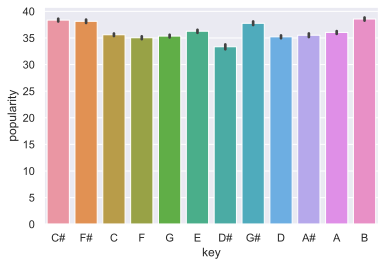

In [23]:
sns.barplot(x="key", y="popularity", data=df_un)

Since there are only two variants of song mode we can easily encode this variable.

Text(0.5, 1.0, 'Popularity Based on Mode')

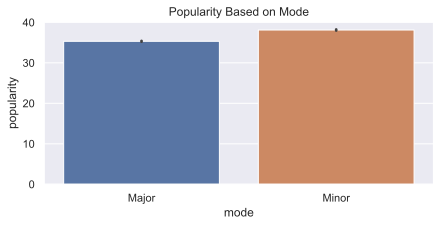

In [24]:
fig, ax = plt.subplots(figsize=(7, 3))
sns.barplot(x = 'mode', y = 'popularity', data = df_un, ax=ax)
plt.title('Popularity Based on Mode')

Text(0.5, 1.0, 'Popularity Based on Time Signature')

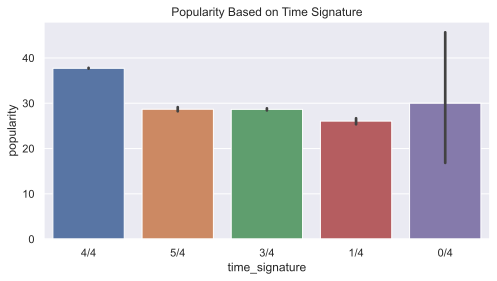

In [25]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=df_un, x="time_signature", y="popularity", ax=ax)
plt.title('Popularity Based on Time Signature')

I will delay encoding the variables and first test the models on the current data format

Let's start train train diffenrent types of models.

 **Function for comparing different models**

In [37]:
def score_dataset(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_squared_error(y_test, preds)

I will try to drop all objects columns.

In [27]:
y = df_un.popularity
x = df_un.drop(columns=['popularity'], axis=1, inplace=False)

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train.head()

,artist_name,track_name,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,...,Pop,Reggae,Reggaeton,Jazz,Rock,Ska,Comedy,Soul,Soundtrack,World
163325,Combinacion De La Habana,Amorfoda,1GxUQ5c7jV9lhWrcdVySJ3,0.1570,0.701,289489,0.804,0.000000,F#,0.3240,...,False,False,True,False,False,False,False,False,False,False
45446,Nightmare,18歳,5weQtVbwUn0pJuFdtaKmya,0.0113,0.488,208667,0.959,0.000004,A#,0.0865,...,False,False,False,False,False,False,False,False,False,False
129468,Wolfgang Amadeus Mozart,"Piano Concerto No. 12 in A Major, K. 414 (Vers...",3XjuR2LXg7AOQTTiOztGzz,0.9690,0.348,410121,0.132,0.635000,D,0.3130,...,False,False,False,False,False,False,False,False,False,False
6066,Flying Lotus,Never Catch Me,6CTG85NJI1Wm60pxTSRNwL,0.3160,0.526,234487,0.936,0.000384,G#,0.2610,...,False,False,False,False,False,False,False,False,False,False
134918,The Wailers,The Oppressed Song - Remastered Version,2MwdEFa0A1r8B7TSRQ6d2a,0.5200,0.678,194427,0.620,0.721000,G,0.1010,...,False,True,False,False,False,False,False,False,False,False


In [33]:
drop_x_train = x_train.select_dtypes(exclude=['object'])
drop_x_test = x_test.select_dtypes(exclude=['object'])

In [38]:
model_1 = LinearRegression()
print("LinearRegression MSE: ", score_dataset(model_1, drop_x_train, drop_x_test, y_train, y_test))

LinearRegression MSE:  107.38739623743865


In [56]:
sorted(list(zip(drop_x_train.columns, model_1.coef_)), 
       key=lambda x: abs(x[1]))

[('duration_ms', 1.6577248818094859e-06),
 ('tempo', -0.0044378563251549295),
 ('loudness', 0.1431723375735108),
 ('danceability', -0.6220393871963065),
 ('acousticness', -0.6375059639458812),
 ('instrumentalness', -1.4453376689072261),
 ('Electronic', -1.4583695381055133),
 ('energy', 1.4613120829090487),
 ('Reggaeton', -2.0982093693813426),
 ('Jazz', 2.2679095642761027),
 ('liveness', -2.5153906005192095),
 ('Reggae', -2.7891826060883274),
 ('valence', -3.1519221285619667),
 ('Soundtrack', -3.440814126419642),
 ('World', -4.6036148378563135),
 ('Blues', -4.739258684024391),
 ('Soul', 4.897670916598372),
 ('Country', 5.072645225267872),
 ('speechiness', -5.149627426637775),
 ('Classical', -7.331673861110955),
 ('R&B', 9.655080712399398),
 ('Alternative', 10.84820806064253),
 ('Folk', 10.958032450822332),
 ('Ska', -11.42925921484548),
 ('Comedy', -11.887423294833273),
 ('Indie', 14.423590504741867),
 ('Anime', -14.667533976913553),
 ('Dance', 18.170849504040195),
 ('Rock', 19.786733414

Let’s look at the error if we exclude genres. Are they really so important?

In [58]:
x_train_nogenres = drop_x_train.select_dtypes(exclude=['bool'])
x_test_nogenres = drop_x_test.select_dtypes(exclude=['bool'])

The MSE difference is significant.

In [59]:
print("LinearRegression MSE: ", score_dataset(model_1, x_train_nogenres, x_test_nogenres, y_train, y_test))

LinearRegression MSE:  243.75855663069723


In [42]:
model_2 = KNeighborsRegressor()
print("KNeighborsRegressor MSE: ", score_dataset(model_2, drop_x_train, drop_x_test, y_train, y_test))

KNeighborsRegressor MSE: 318.3704517041437


In [45]:
model_3 = DecisionTreeClassifier()
print("DecisionTreeClassifier MSE: ", score_dataset(model_3, drop_x_train, drop_x_test, y_train, y_test))

DecisionTreeClassifier MSE:  181.3142978362325


In [48]:
model_4 = DecisionTreeRegressor()
print("DecisionTreeRegressor MSE: ", score_dataset(model_4, drop_x_train, drop_x_test, y_train, y_test))

DecisionTreeRegressor MSE:  187.76837081035214


In [53]:
model_5 = SGDRegressor(tol=.0001, eta0=.01, )
print("SGDRegressor MSE: ", score_dataset(model_5, drop_x_train, drop_x_test, y_train, y_test))

SGDRegressor MSE:  4.884650594178199e+34
